In [1]:
import pandas as pd 
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("brca.csv")
data.head()
data.dropna()
data.isnull().any()

Unnamed: 0             False
x.radius_mean          False
x.texture_mean         False
x.perimeter_mean       False
x.area_mean            False
x.smoothness_mean      False
x.compactness_mean     False
x.concavity_mean       False
x.concave_pts_mean     False
x.symmetry_mean        False
x.fractal_dim_mean     False
x.radius_se            False
x.texture_se           False
x.perimeter_se         False
x.area_se              False
x.smoothness_se        False
x.compactness_se       False
x.concavity_se         False
x.concave_pts_se       False
x.symmetry_se          False
x.fractal_dim_se       False
x.radius_worst         False
x.texture_worst        False
x.perimeter_worst      False
x.area_worst           False
x.smoothness_worst     False
x.compactness_worst    False
x.concavity_worst      False
x.concave_pts_worst    False
x.symmetry_worst       False
x.fractal_dim_worst    False
y                      False
dtype: bool

In [3]:
data=data.drop(['Unnamed: 0'],axis=1)

In [4]:
data['y']=data['y'].replace(['M','B'],[1,0])
data.describe()

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [5]:
data.rename(columns = {'x.radius_mean':'radius_mean','x.texture_mean':'texture_mean','x.perimeter_mean':'perimeter_mean','x.area_mean':'area_mean',
                        'x.smoothness_mean':'smoothness_mean','x.compactness_mean':'compactness_mean','x.concavity_mean':'concavity_mean',
                      'x.concave_pts_mean':'concave_pts_mean','x.symmetry_mean':'symmetry_mean','x.fractal_dim_mean':'fractal_dim_mean',
                      'x.radius_se':'radius_se','x.texture_se':'texture_se','x.perimeter_se':'perimeter_se','x.area_se':'area_se','x.smoothness_se':'smoothness_se',
                      'x.compactness_se':'compactness_se','x.concavity_se':'concavity_se','x.concave_pts_se':'concave_pts_se','x.symmetry_se':'symmetry_se',
                      'x.fractal_dim_se':'fractal_dim_se','x.radius_worst':'radius_worst','x.texture_worst':'texture_worst','x.perimeter_worst':'perimeter_worst',
                      'x.area_worst':'area_worst','x.smoothness_worst':'smoothness_worst','x.compactness_worst':'compactness_worst','x.concavity_worst':'concavity_worst',
                      'x.concave_pts_worst':'concave_pts_worst','x.symmetry_worst':'symmetry_worst','x.fractal_dim_worst':'fractal_dim_worst'}, inplace = True)
data.nunique()

radius_mean          456
texture_mean         479
perimeter_mean       522
area_mean            539
smoothness_mean      474
compactness_mean     537
concavity_mean       537
concave_pts_mean     542
symmetry_mean        432
fractal_dim_mean     499
radius_se            540
texture_se           519
perimeter_se         533
area_se              528
smoothness_se        547
compactness_se       541
concavity_se         533
concave_pts_se       507
symmetry_se          498
fractal_dim_se       545
radius_worst         457
texture_worst        511
perimeter_worst      514
area_worst           544
smoothness_worst     411
compactness_worst    529
concavity_worst      539
concave_pts_worst    492
symmetry_worst       500
fractal_dim_worst    535
y                      2
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

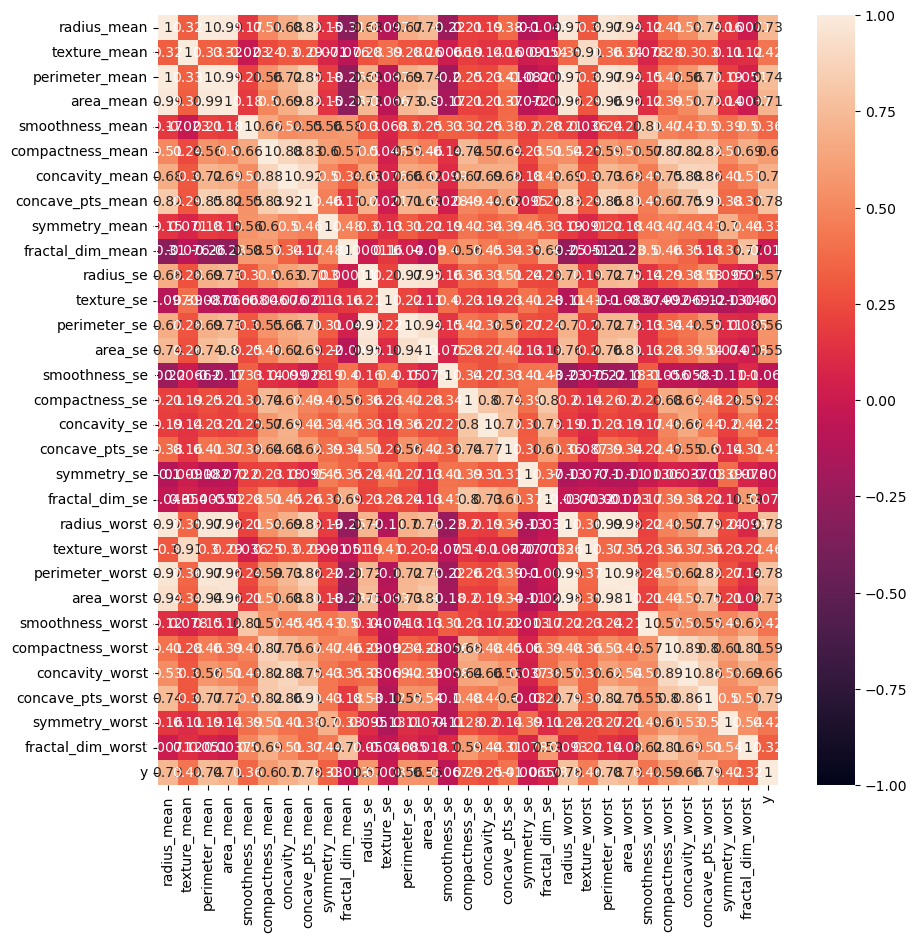

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),vmin=-1,vmax=1,annot=True)
plt.show

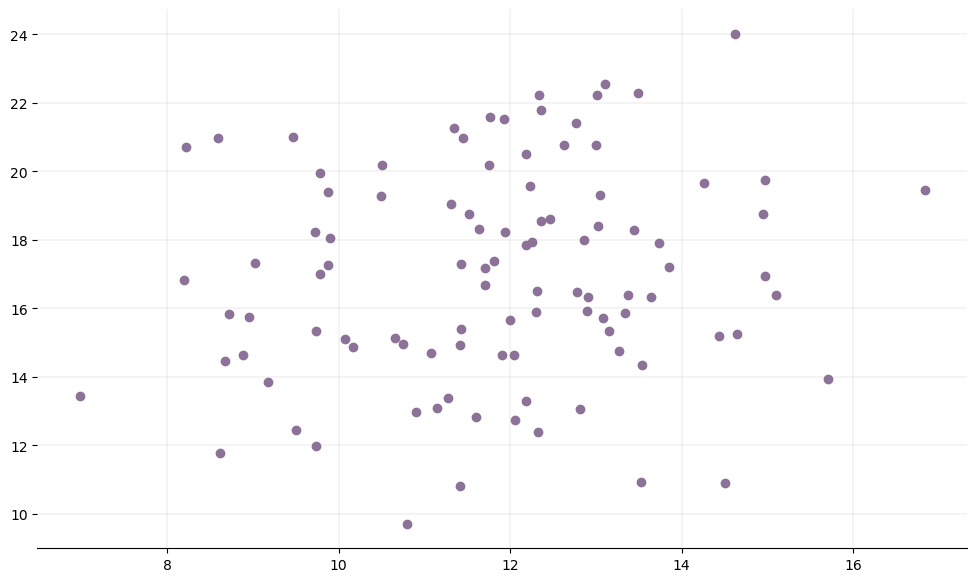

In [7]:
X=data['radius_mean']
Y=data['texture_mean']
out=data['y']
fig, ax = plt.subplots(figsize=(12, 7))

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.scatter(X[:100], Y[:100], color="#8C7298")
plt.show()

In [8]:

len(data)

569

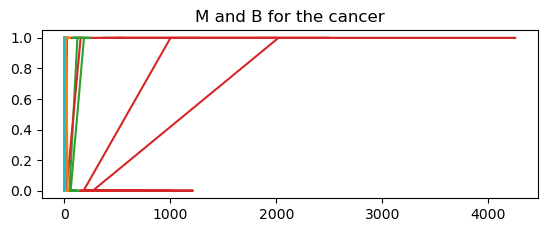

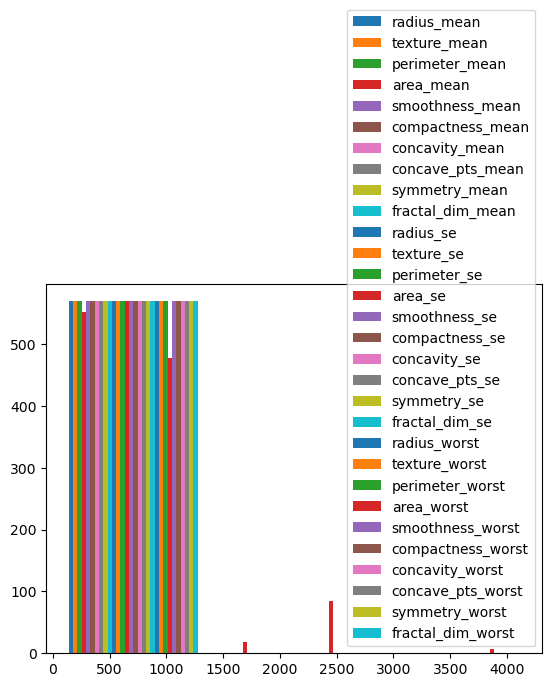

In [9]:
x=data.drop(['y'],axis=1)
y=data['y']
plt.subplot(2,1,2)
plt.plot(x,y)

plt.title("M and B for the cancer")
plt.show()
plt.hist(x,bins=3)
plt.legend(['radius_mean',
'texture_mean',
'perimeter_mean',
'area_mean',
'smoothness_mean',
'compactness_mean',
'concavity_mean',
'concave_pts_mean',
'symmetry_mean',
'fractal_dim_mean',
'radius_se',
'texture_se',
'perimeter_se',
'area_se',
'smoothness_se',
'compactness_se',
'concavity_se',
'concave_pts_se',
'symmetry_se',
'fractal_dim_se',
'radius_worst',
'texture_worst',
'perimeter_worst',
'area_worst',
'smoothness_worst',
'compactness_worst',
'concavity_worst',
'concave_pts_worst',
'symmetry_worst',
'fractal_dim_worst'])
plt.show()

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=200,test_size=0.2)

In [11]:
print(len(x_train),len(y_train))

455 455


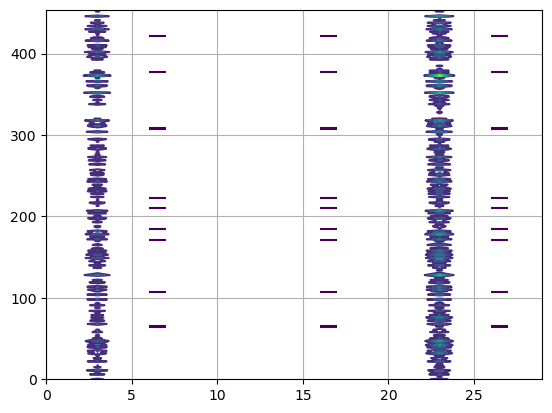

In [12]:
plt.contour(x_train)
plt.grid()
plt.show()

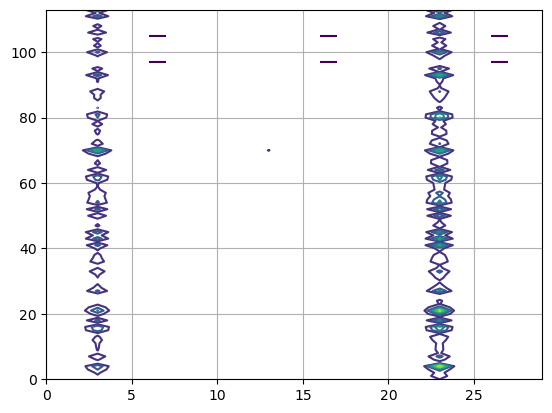

In [13]:
plt.contour(x_test)
plt.grid()
plt.show()

In [14]:
s_v_m=svm.SVC(kernel="linear")

In [15]:
s_v_m.fit(x_train,y_train)


SVC(kernel='linear')

In [17]:
import numpy as np
from sklearn.metrics import precision_score,recall_score,f1_score
acc_test=s_v_m.predict(x_test)
acc1=accuracy_score(acc_test,y_test)
print(acc1)
acc_train=s_v_m.predict(x_train)
acc1=accuracy_score(acc_train,y_train)
print(acc1)
print("Precision Score: ", precision_score(y_test,acc_test, average="macro").mean()*100)
print("Recall Score: ", recall_score(y_test,acc_test , average="macro").mean()*100)
print("F1 Score: ",f1_score(y_test,acc_test, average="macro").mean()*100)
data['predict']=pd.Series(s_v_m.predict(x))
data.head()
data.to_csv("predict data1.csv",index=False)

0.956140350877193
0.9692307692307692
Precision Score:  95.9280303030303
Recall Score:  95.28478057889822
F1 Score:  95.53676297862343


In [16]:
import numpy as np
input_data=(24.01,1.0,85.63,5,0.1075,0.127,0.04568,0.0311,0.7,0.06811,0.1852,0.7477,1.383,14.67,0.004097,0.01898,0.01698,0.00649,0.01678,0.25,14.5,20.49,96.09,630.5,0.12,0.2776,0.189,0.07283,0.3184,0.83)
inputas=np.asarray(input_data)
input_datare=inputas.reshape(1,-1)
prediction3=s_v_m.predict(input_datare)
if (prediction3==0):
    print("it is benign")
else:
    print("it is malignant")

it is benign


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [17]:
from sklearn.model_selection import GridSearchCV 
  

param_grid = {'C': [0.1,100,1000,10000],
  
              'gamma':[0.01,0.001,0.0001,0.00001], 
              'kernel': ['rbf']}  
  
bc_grid = GridSearchCV(s_v_m, param_grid, refit = True, verbose = 3) 
  

bc_grid.fit(x_train, y_train) 

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.626 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.626 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.626 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.626 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.626 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.626 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.626 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.626 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.923 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 100, 1000, 10000],
                         'gamma': [0.01, 0.001, 0.0001, 1e-05],
                         'kernel': ['rbf']},
             verbose=3)

In [18]:
predict=bc_grid.predict(x_test)
acc=accuracy_score(y_test,predict)
print(acc)     

0.9649122807017544


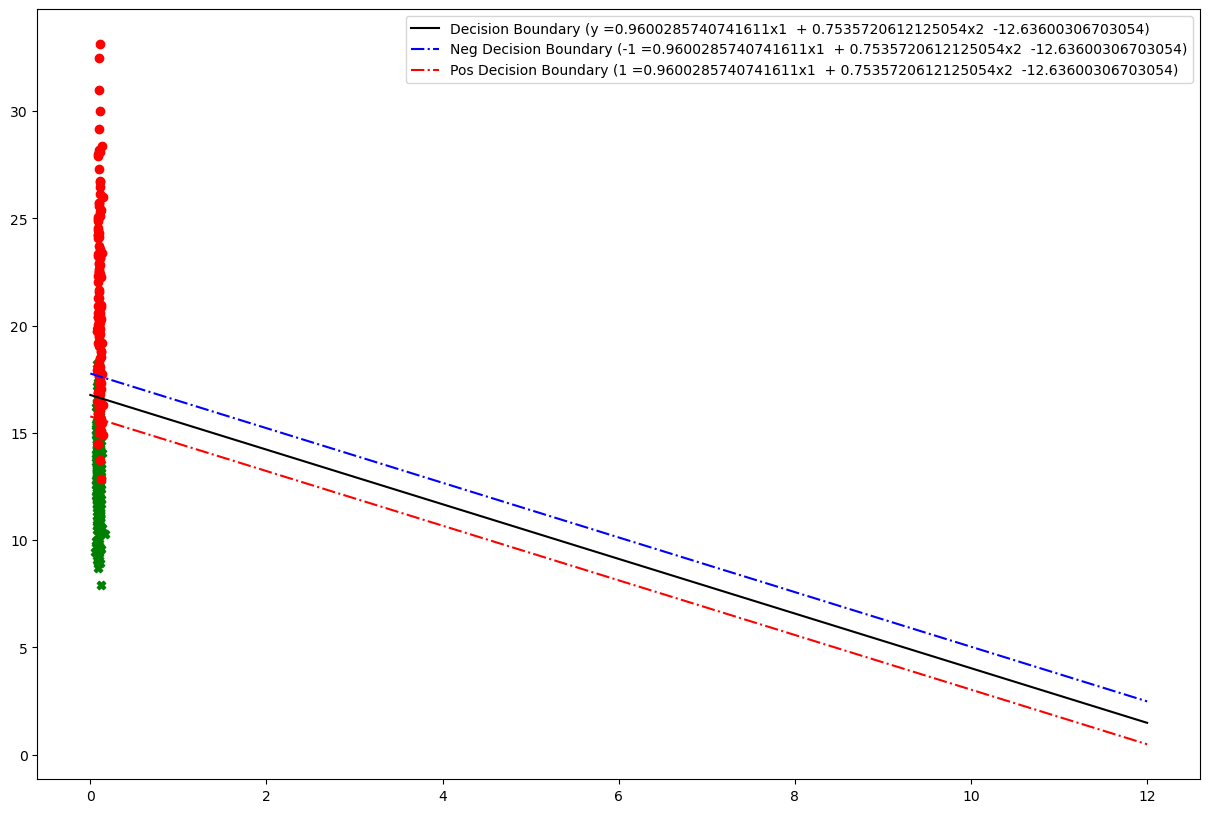

Margin : 1.638724675013312


In [19]:

# Import Necessary libraries/functions
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC


X=data.get(['smoothness_mean','radius_worst']).to_numpy()
Y=data['y']
clf=svm.SVC( gamma='auto',kernel='linear')
clf.fit(X,Y)
# plot the decision boundary ,data points,support vector etcv
w = clf.coef_[0]
a = -w[0] / w[1]
 
xx = np.linspace(0,12)
yy = a * xx - clf.intercept_[0] / w[1]
y_neg = a * xx - clf.intercept_[0] / w[1] + 1
y_pos = a * xx - clf.intercept_[0] / w[1] - 1
plt.figure(1,figsize= (15, 10))
plt.plot(xx, yy, 'k', 
         label=f"Decision Boundary (y ={w[0]}x1  + {w[1]}x2  {clf.intercept_[0] })")
plt.plot(xx, y_neg, 'b-.', 
         label=f"Neg Decision Boundary (-1 ={w[0]}x1  + {w[1]}x2  {clf.intercept_[0] })")
plt.plot(xx, y_pos, 'r-.', 
         label=f"Pos Decision Boundary (1 ={w[0]}x1  + {w[1]}x2  {clf.intercept_[0] })")
 
for i in range(500):
  if (Y[i]==1):
      plt.scatter(X[i][0], X[i][1],color='red', marker='o')
       
  elif (Y[i]==0):
        plt.scatter(X[i][0], X[i][1],color='green', marker='X')
        
      
plt.legend()
plt.show()
 
# calculate margin
print(f'Margin : {2.0 /np.sqrt(np.sum(clf.coef_ ** 2)) }')

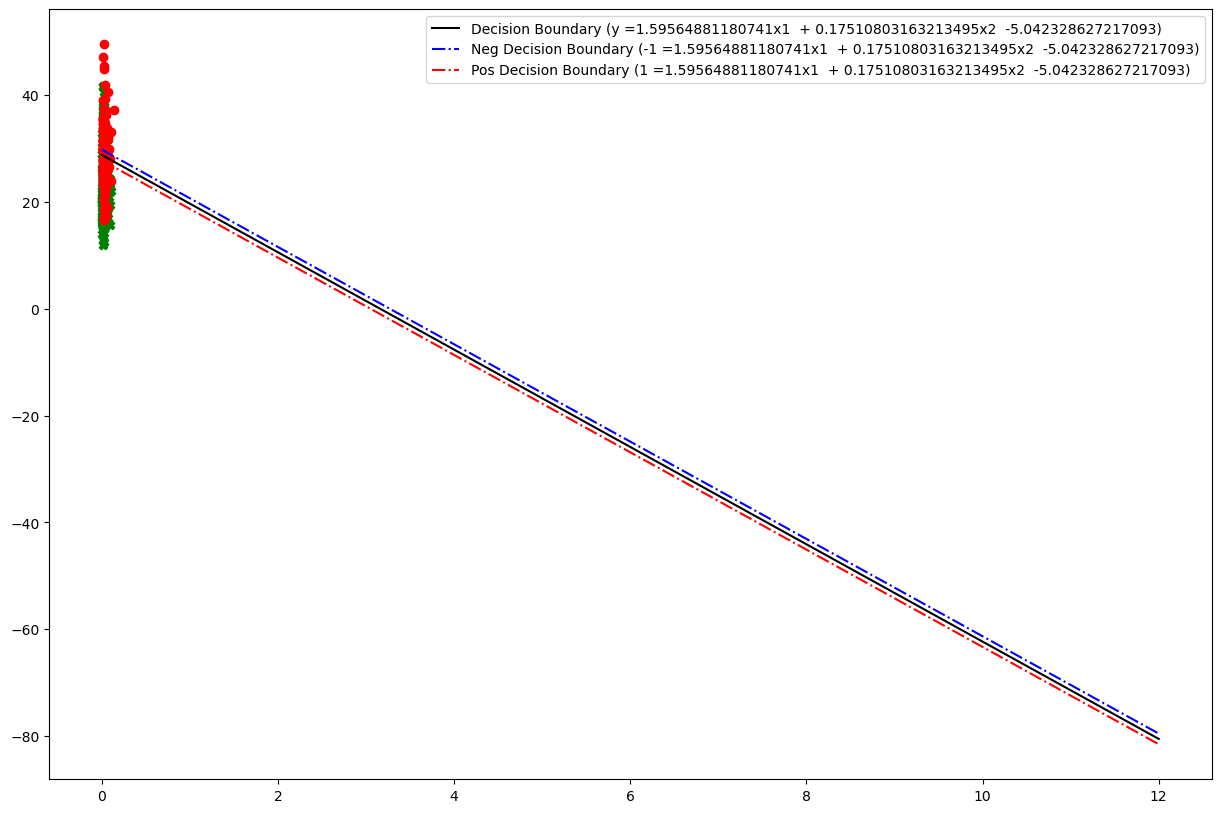

Margin : 1.2459286802983485


In [20]:
import numpy as np
import pylab as pl
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC


X=data.get(['compactness_se','texture_worst']).to_numpy()
Y=data['y']
clf=svm.SVC( gamma='auto',kernel='linear')
clf.fit(X,Y)
# plot the decision boundary ,data points,support vector etcv
w = clf.coef_[0]
a = -w[0] / w[1]
 
xx = np.linspace(0,12)
yy = a * xx - clf.intercept_[0] / w[1]
y_neg = a * xx - clf.intercept_[0] / w[1] + 1
y_pos = a * xx - clf.intercept_[0] / w[1] - 1
plt.figure(1,figsize= (15, 10))
plt.plot(xx, yy, 'k', 
         label=f"Decision Boundary (y ={w[0]}x1  + {w[1]}x2  {clf.intercept_[0] })")
plt.plot(xx, y_neg, 'b-.', 
         label=f"Neg Decision Boundary (-1 ={w[0]}x1  + {w[1]}x2  {clf.intercept_[0] })")
plt.plot(xx, y_pos, 'r-.', 
         label=f"Pos Decision Boundary (1 ={w[0]}x1  + {w[1]}x2  {clf.intercept_[0] })")
 
for i in range(500):
  if (Y[i]==1):
      plt.scatter(X[i][0], X[i][1],color='red', marker='o')
       
  elif (Y[i]==0):
        plt.scatter(X[i][0], X[i][1],color='green', marker='X')
        
      
plt.legend()
plt.show()
 
# calculate margin
print(f'Margin : {2.0 /np.sqrt(np.sum(clf.coef_ ** 2)) }')

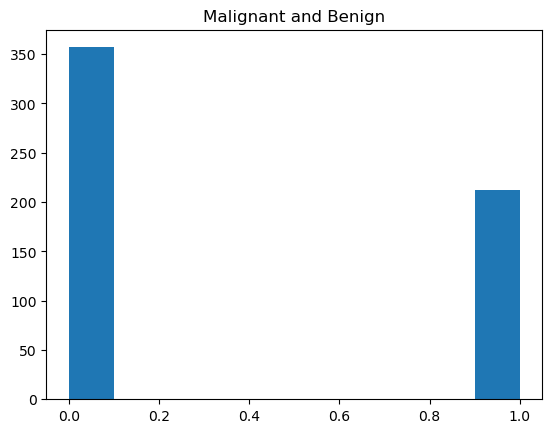

In [21]:
plt.hist(Y)
plt.title('Malignant and Benign')
plt.show()